<a href="https://colab.research.google.com/github/muhammadarya11/AnemiCare/blob/ML/Capstone_Anemia_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project

**Title:** Anemia Prediction Based on Blood Lab Results  
**Dataset:** [Kaggle - Anemia Types Classification](https://www.kaggle.com/datasets/ehababoelnaga/anemia-types-classification)  
**Github:** https://github.com/muhammadarya11/AnemiCare

**Team ID:** C242-PS485

**Team Members:**
1. Kiki Aimar Wicaksana, ML (M335B4KY2216) – Universitas Yarsi
2. Muhammad Ramadhan Prinada, ML (M335B4KY3203) – Universitas Yarsi
3. Arina Pramudita, ML (M194B4KX0694) – Universitas Budi Luhur
4. Karin Novrika, CC (C128B4KX2140) – Politeknik Negeri Jakarta
5. Muhammad Arya Kusuma, CC (C335B4KY2748) – Universitas Yarsi
6. I Komang Abimanyu, MD (A335B4KY1840) – Universitas Yarsi

**Overview:**

Anemia, a common condition, can lead to serious complications if not diagnosed promptly. Traditional diagnosis is often time-consuming, potentially delaying treatment. This project aims to assist healthcare providers in quickly classifying anemia types through machine learning. Using Complete Blood Count (CBC) test data, our application predicts anemia types, including 'Normocytic hypochromic anemia,' 'Iron deficiency anemia,' 'Other microcytic anemia,' 'Leukemia,' 'Thrombocytopenia,' and 'Macrocytic anemia.'



## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, AdamW
from tensorflow.keras.regularizers import l2, l1

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file1 = '/content/drive/MyDrive/diagnosed_cbc_data_v4.csv'
file2 = '/content/drive/MyDrive/cbc2.csv'

Mounted at /content/drive


In [3]:
# read file 1
df = pd.read_csv(file1)
df.head(10)

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia
5,6.6,27.3,65.4,1.8,4.3,3.96,8.8,29.7,75.2,22.2,79.6,207.0,11.5,0.18,Other microcytic anemia
6,16.7,19.1,68.2,3.2,11.4,5.15,14.2,44.8,87.1,27.5,31.6,151.0,12.8,0.14,Leukemia
7,9.3,27.4,64.0,2.6,5.9,4.39,12.0,37.9,86.4,27.3,31.6,194.0,15.9,0.19,Normocytic hypochromic anemia
8,5.2,19.7,72.4,1.0,3.8,4.85,13.2,41.0,84.7,27.2,32.1,181.0,10.0,0.15,Healthy
9,10.5,12.4,79.0,1.3,8.3,4.57,12.4,38.9,85.3,27.1,31.8,164.0,11.3,0.14,Normocytic hypochromic anemia


In [ ]:
# read file 2
df_2 = pd.read_csv(file2)
df_2.head(10)

,S. No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB
0,NaN,NaN,NaN,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,NaN,Red Cell Distribution width,"White Blood Cell (WBC count),",Platelet,Hemoglobin
1,1.0,28.0,0.0,5.66,34,60.1,17,28.2,20,11.1,128.3,9.6
2,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13,7.02,419,13.8
3,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13,8.09,325,13.4
4,4.0,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264,11.3
5,5.0,20.0,1.0,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196,11.5
6,6.0,24.0,0.0,4.29,40.1,93.5,29.6,31.7,14.5,13.96,233,12.7
7,7.0,28.0,1.0,4.98,42.3,84.9,24.9,29.3,16.2,9.33,213,12.4
8,8.0,14.0,0.0,4.97,43.8,88.1,28,31.7,15.2,3.92,229,13.9
9,9.0,16.0,0.0,4.16,38.7,93,28.8,31.0,17.9,5.77,211,12


## Data Exploration

In [ ]:
print(df.shape)
df.info()

(1281, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [ ]:
df.describe()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.0000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,7.862717,25.845000,77.511000,1.880760,5.140940,4.708267,12.184551,46.1526,85.793919,32.084840,31.739149,229.981421,14.312512,0.260280
std,3.564466,7.038728,147.746273,1.335689,2.872294,2.817200,3.812897,104.8861,27.177663,111.170756,3.300352,93.019336,3.005079,0.685351
min,0.800000,6.200000,0.700000,0.200000,0.500000,1.360000,-10.000000,2.0000,-79.300000,10.900000,11.500000,10.000000,8.400000,0.010000
25%,6.000000,25.845000,71.100000,1.880760,5.100000,4.190000,10.800000,39.2000,81.200000,25.500000,30.600000,157.000000,13.300000,0.170000
50%,7.400000,25.845000,77.511000,1.880760,5.140940,4.600000,12.300000,46.1526,86.600000,27.800000,32.000000,213.000000,14.312512,0.260280
75%,8.680000,25.845000,77.511000,1.880760,5.140940,5.100000,13.500000,46.1526,90.200000,29.600000,32.900000,293.000000,14.700000,0.260280
max,45.700000,91.400000,5317.000000,41.800000,79.000000,90.800000,87.100000,3715.0000,990.000000,3117.000000,92.800000,660.000000,97.000000,13.600000


In [ ]:
# missing value
df.isna().sum()

,0
WBC,0
LYMp,0
NEUTp,0
LYMn,0
NEUTn,0
RBC,0
HGB,0
HCT,0
MCV,0
MCH,0


In [4]:
# data duplicate
print("Jumlah duplikasi pada data: ", df.duplicated().sum())

# drop duplilcate data
df.drop_duplicates(inplace=True)
print("Jumlah duplikasi pada data: ", df.duplicated().sum())

Jumlah duplikasi pada data:  49
Jumlah duplikasi pada data:  0


In [ ]:
# feature description
column_descriptions = {
    "WBC": ["White Blood Cell count", "jumlah sel darah putih dalam darah"],
    "LYMp": ["Lymphocyte percentage", "sel darah putih yang membantu melawan infeksi"],
    "NEUTp": ["Neutrophil percentage", "sel darah putih yang penting dalam melawan bakteri"],
    "LYMn": ["Lymphocyte number", "jumlah absolut limfosit dalam darah"],
    "NEUTn": ["Neutrophil number", "jumlah absolut neutrofil dalam darah"],
    "RBC": ["Red Blood Cell count", "jumlah sel darah merah"],
    "HGB": ["Hemoglobin level", "protein dalam sel darah merah yang membawa oksigen"],
    "HCT": ["Hematocrit", "persentase volume darah yang terdiri dari sel darah merah"],
    "MCV": ["Mean Corpuscular Volume", "rata-rata volume sel darah merah, membantu dalam mendiagnosis jenis anemia"],
    "MCH": ["Mean Corpuscular Hemoglobin", "rata-rata jumlah hemoglobin per sel darah merah"],
    "MCHC": ["Mean Corpuscular Hemoglobin Concentration", "rata-rata konsentrasi hemoglobin dalam volume sel darah merah"],
    "PLT": ["Platelet count", "jumlah trombosit, yang berperan dalam proses pembekuan darah"],
    "PDW": ["Platelet Distribution Width", "ukuran distribusi ukuran trombosit dalam darah"],
    "PCT": ["Plateletcrit", "persentase volume darah yang terdiri dari trombosit"],
    "Diagnosis": ["Output/Label", "tipe anemia"]
}

# using table
df_descriptions = pd.DataFrame.from_dict(column_descriptions, orient="index", columns=["Description", "Additional Description"])
df_descriptions.reset_index(inplace=True)
df_descriptions.rename(columns={"index": "Column"}, inplace=True)

# merapihkan table
def left_align(s):
    return ['text-align: left' for _ in s]

styled_df = df_descriptions.style.apply(left_align, axis=1).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)

styled_df

,Column,Description,Additional Description
0,WBC,White Blood Cell count,jumlah sel darah putih dalam darah
1,LYMp,Lymphocyte percentage,sel darah putih yang membantu melawan infeksi
2,NEUTp,Neutrophil percentage,sel darah putih yang penting dalam melawan bakteri
3,LYMn,Lymphocyte number,jumlah absolut limfosit dalam darah
4,NEUTn,Neutrophil number,jumlah absolut neutrofil dalam darah
5,RBC,Red Blood Cell count,jumlah sel darah merah
6,HGB,Hemoglobin level,protein dalam sel darah merah yang membawa oksigen
7,HCT,Hematocrit,persentase volume darah yang terdiri dari sel darah merah
8,MCV,Mean Corpuscular Volume,"rata-rata volume sel darah merah, membantu dalam mendiagnosis jenis anemia"
9,MCH,Mean Corpuscular Hemoglobin,rata-rata jumlah hemoglobin per sel darah merah


In [ ]:
# output / label
label = df['Diagnosis'].unique()
print(label)
print(label.dtype)

['Normocytic hypochromic anemia' 'Iron deficiency anemia'
 'Other microcytic anemia' 'Leukemia' 'Healthy' 'Thrombocytopenia'
 'Normocytic normochromic anemia' 'Leukemia with thrombocytopenia'
 'Macrocytic anemia']
object


## Data Visualization

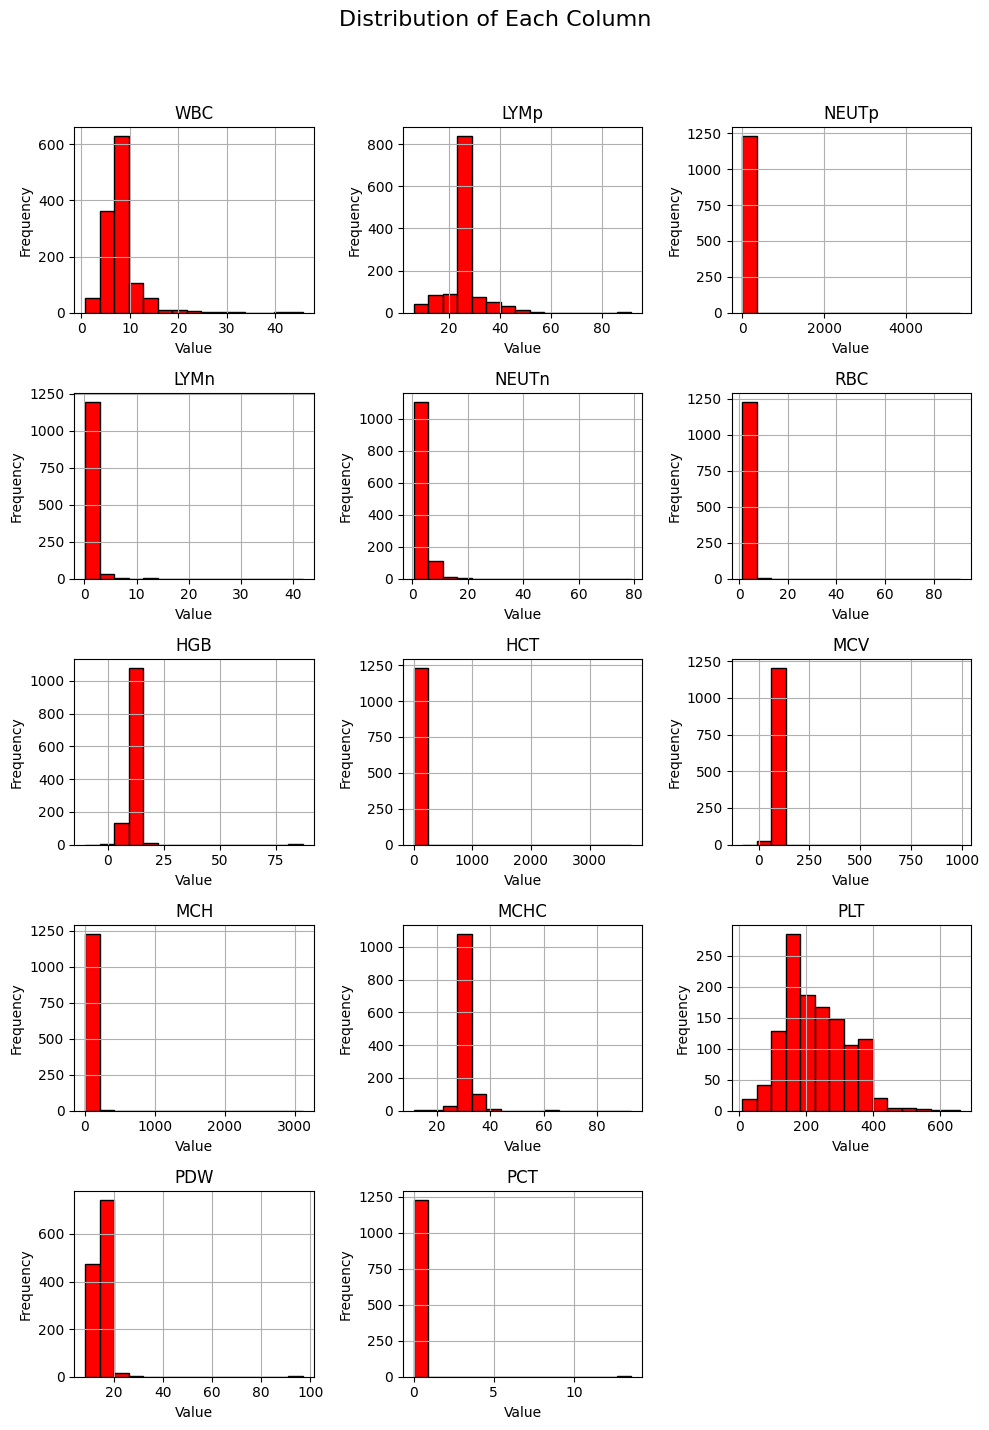

In [ ]:
# feature distribution

# numeric column
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# size and grid
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 15))
fig.suptitle('Distribution of Each Column', fontsize=16)
axes = axes.flatten()  # Mengubah grid menjadi array untuk iterasi

# histogram for each feature
for i, col in enumerate(numeric_columns):
    df[col].hist(ax=axes[i], bins=15, color='r', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

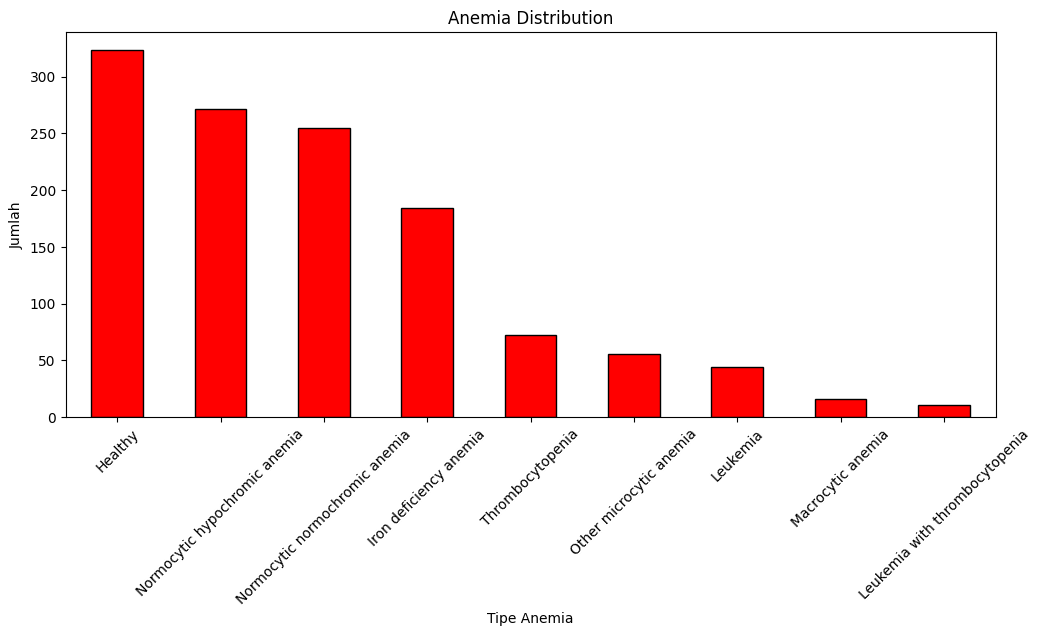

In [ ]:
# label distribution
anemia_counts = df['Diagnosis'].value_counts()

# plot bar char
plt.figure(figsize=(12, 5))
anemia_counts.plot(kind='bar', color='r', edgecolor='black')
plt.title('Anemia Distribution')
plt.xlabel('Tipe Anemia')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

## Data Preprocessing

In [94]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop('Diagnosis', axis=1)  # feature
y = df['Diagnosis']  # label

# split data 80:10:10
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# upsampling data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# data normalization
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_resampled)
X_val_scaled = sc.transform(X_val)
X_test_scaled = sc.transform(X_test)

# konversi label string
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_resampled)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# konversi ke dataset tensorflow
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_encoded))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val_encoded))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_encoded))

# shuffle, buffer, and batch
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(32)
val_dataset = val_dataset.batch(32)
test_dataset = test_dataset.batch(32)

train_dataset, val_dataset, test_dataset

(<_BatchDataset element_spec=(TensorSpec(shape=(None, 14), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 14), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 14), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

### Plot Distribution

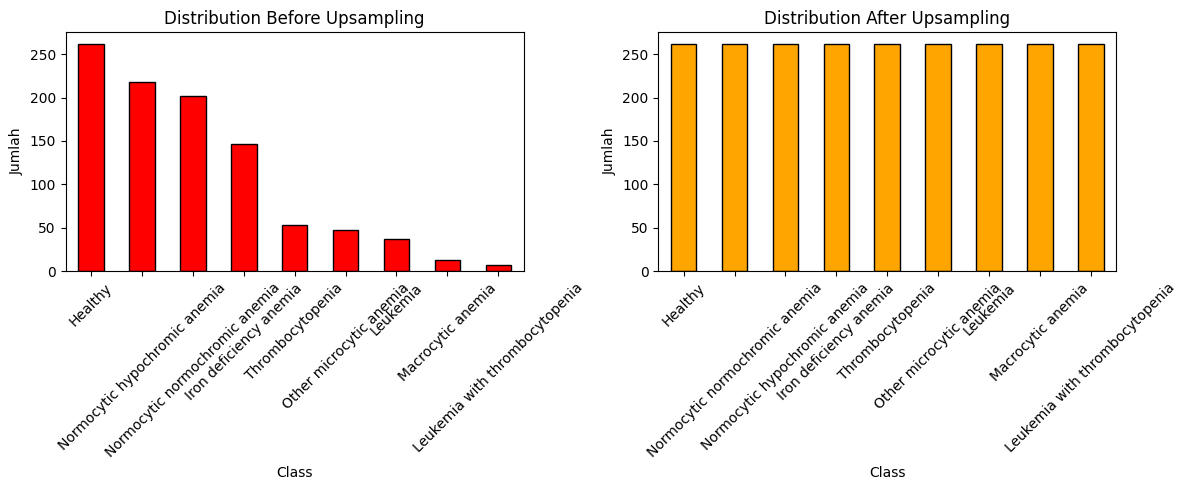

In [7]:
# plot distribution after upsampling
import matplotlib.pyplot as plt

y_train_original_counts = y_train.value_counts()
y_train_resampled_counts = pd.Series(y_train_resampled).value_counts()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
y_train_original_counts.plot(kind='bar', color='red', edgecolor='black')
plt.title('Distribution Before Upsampling')
plt.xlabel('Class')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
y_train_resampled_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Distribution After Upsampling')
plt.xlabel('Class')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Input Output

In [ ]:
# check input shape

print("data shape X_train_scaled:", train_dataset.element_spec[0].shape)
print("data shape y_train_encoded:", train_dataset.element_spec[1].shape)
print()

print("input (X_train_scaled index 1):")
print(X_train_scaled[0])
print()

print("input data type:", type(X_train_scaled))

data shape X_train_scaled: (None, 14)
data shape y_train_encoded: (None,)

input (X_train_scaled index 1):
[-0.33586571  0.2064293   0.01706348  0.05156998 -0.1571603   0.08909174
  0.12902876  0.33667579 -0.07630297 -0.14471432  0.01769974 -0.54445076
  0.00098104 -0.01885061]

input data type: <class 'numpy.ndarray'>


In [ ]:
# label index

output_df = pd.DataFrame({
    "Original Label": label_encoder.classes_,
    "Encoded Value / Index Output": range(len(label_encoder.classes_))
})

def left_align(s):
    return ['text-align: left' for _ in s]

output2_df = output_df.style.apply(left_align, axis=1).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)

output2_df

,Original Label,Encoded Value / Index Output
0,Healthy,0
1,Iron deficiency anemia,1
2,Leukemia,2
3,Leukemia with thrombocytopenia,3
4,Macrocytic anemia,4
5,Normocytic hypochromic anemia,5
6,Normocytic normochromic anemia,6
7,Other microcytic anemia,7
8,Thrombocytopenia,8


## Model

In [95]:
reg = 0.001
epochs = 150
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

### Model 1

In [99]:
model_1 = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),

    Dense(64, activation='leaky_relu', kernel_regularizer=l2(reg)),
    Dropout(0.2),
    Dense(128, activation='leaky_relu', kernel_regularizer=l2(reg)),
    Dropout(0.2),
    Dense(256, activation='leaky_relu', kernel_regularizer=l2(reg)),
    Dropout(0.2),
    Dense(512, activation='leaky_relu', kernel_regularizer=l2(reg)),
    Dropout(0.2),

    Dense(256, activation='leaky_relu', kernel_regularizer=l2(reg)),

    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_1.compile(optimizer=Adam(),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Print input/output shapes and model summary
print("Input shape of the model:", model_1.input_shape)
print("Output shape of the model:", model_1.output_shape)
print()
print(model_1.summary())

Input shape of the model: (None, 14)
Output shape of the model: (None, 9)



Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_121 (Dense)                    │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_92 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_93 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_94 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_124 (Dense)                    │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_95 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_126 (Dense)                    │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 307,529 (1.17 MB)

 Trainable params: 307,529 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

None


In [100]:
history_1 = model_1.fit(train_dataset,
                      epochs=epochs,
                      validation_data=val_dataset,
                      batch_size=32,
                      callbacks=[reduce_lr],
                      verbose=1
                    )

Epoch 1/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 118ms/step - accuracy: 0.3688 - loss: 2.8136 - val_accuracy: 0.5203 - val_loss: 3.4202 - learning_rate: 0.0010
Epoch 2/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6358 - loss: 2.0435 - val_accuracy: 0.5935 - val_loss: 2.3220 - learning_rate: 0.0010
Epoch 3/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6851 - loss: 1.6549 - val_accuracy: 0.6341 - val_loss: 2.4685 - learning_rate: 0.0010
Epoch 4/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7343 - loss: 1.4262 - val_accuracy: 0.6829 - val_loss: 1.4782 - learning_rate: 0.0010
Epoch 5/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7655 - loss: 1.2910 - val_accuracy: 0.6911 - val_loss: 1.3688 - learning_rate: 0.0010
Epoch 6/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7827 - loss: 1.1691 - val_accuracy: 0.6911 - val_loss: 1.4308 - learning_rate: 0.0010
Epoch 7/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8034 - loss: 1.1324 - val_

In [101]:
model_1.evaluate(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.9463 - loss: 0.5374


[0.6261070966720581, 0.9516128897666931]

### Model 2

In [74]:
model_2 = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),

    Dense(64, activation='relu', kernel_regularizer=l2(reg)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu', kernel_regularizer=l2(reg)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(len(label_encoder.classes_), activation='softmax')
])


model_2.compile(optimizer=Adam(),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

print("Input shape of the model:", model_2.input_shape)
print("Output shape of the model:", model_2.output_shape)
print()

print(model_2.summary())

Input shape of the model: (None, 14)
Output shape of the model: (None, 9)



Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_90 (Dense)                     │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_69 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_70 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,209 (43.79 KB)

 Trainable params: 10,825 (42.29 KB)

 Non-trainable params: 384 (1.50 KB)

None


In [75]:
# train model
history_2 = model_2.fit(train_dataset,
                    epochs=epochs,
                    validation_data=val_dataset,
                    callbacks=[reduce_lr],
                    verbose=1
                    )

Epoch 1/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.2688 - loss: 2.5033 - val_accuracy: 0.5203 - val_loss: 2.6676 - learning_rate: 0.0010
Epoch 2/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5124 - loss: 1.6769 - val_accuracy: 0.6504 - val_loss: 2.3467 - learning_rate: 0.0010
Epoch 3/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5618 - loss: 1.4406 - val_accuracy: 0.6667 - val_loss: 2.2035 - learning_rate: 0.0010
Epoch 4/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5956 - loss: 1.2906 - val_accuracy: 0.6911 - val_loss: 2.2023 - learning_rate: 0.0010
Epoch 5/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6580 - loss: 1.1800 - val_accuracy: 0.7073 - val_loss: 1.8464 - learning_rate: 0.0010
Epoch 6/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6548 - loss: 1.1088 - val_accuracy: 0.6748 - val_loss: 1.8032 - learning_rate: 0.0010
Epoch 7/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6927 - loss: 1.0413 - val_ac

In [76]:
# Evaluasi model
test_loss, test_accuracy = model_2.evaluate(test_dataset)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.9281 - loss: 0.5229
Test Loss: 0.6292563676834106, Test Accuracy: 0.9112903475761414


## Training Result

### Helper Function

In [32]:
# helper function
def plot_training_history(history, model_name="Model"):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title(f'{model_name}: Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'{model_name}: Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='best')

    plt.show()

### Plot Model

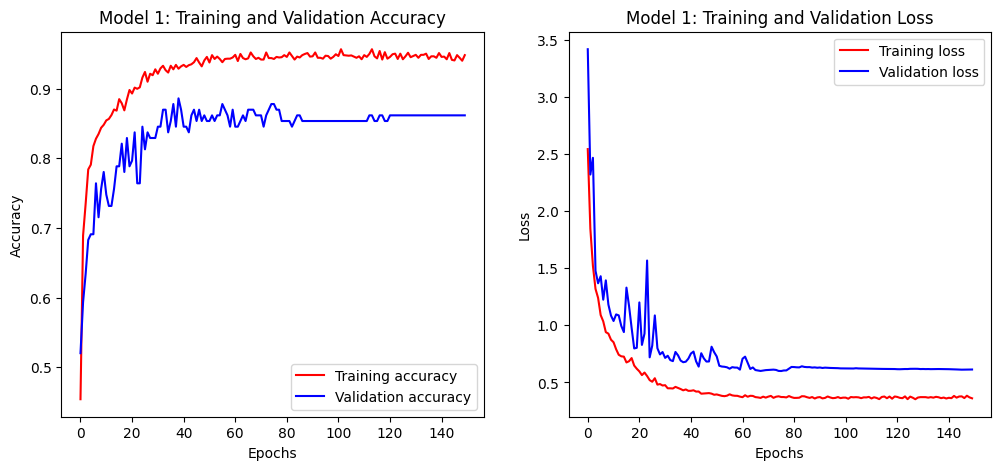

In [102]:
plot_training_history(history_1, model_name="Model 1")

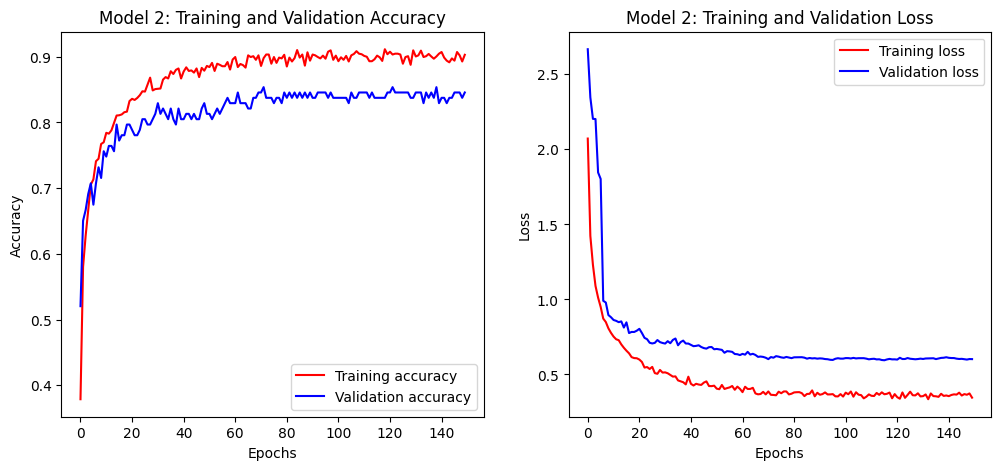

In [77]:
plot_training_history(history_2, model_name="Model 2")

## Model Prediction

### Helper Function

In [103]:
def predict(model, input_list, scaler, label_encoder):

    input_array = np.array(input_list).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    output_model = model.predict(input_scaled)
    predicted_label = np.argmax(output_model, axis=1)

    return label_encoder.classes_[predicted_label][0]

In [104]:
def predict_on_test_dataset(model, test_dataset, y_test_encoded, label_encoder):

    predictions = model.predict(test_dataset)
    predicted_classes = tf.argmax(predictions, axis=1)
    predicted_labels = label_encoder.inverse_transform(predicted_classes.numpy())
    actual_labels = label_encoder.inverse_transform(y_test_encoded)
    comparison_df = pd.DataFrame({
        'Actual': actual_labels,
        'Predicted': predicted_labels
    })

    random_sample_df = comparison_df.sample(10).reset_index(drop=True)

    def left_align(s):
        return ['text-align: left' for _ in s]

    style_df = random_sample_df.style.apply(left_align, axis=1).set_table_styles(
        [{'selector': 'th', 'props': [('text-align', 'left')]}]
    )

    return style_df

### Predict

In [105]:
input_list = [7.04013314, 26.40465422, 71.83098941, 1.81192925, 4.9590166, 4.66833758,
              5.70866842, 182.13405676, 84.93527652, 15.61875771,
              20.4905213, 140.31264139, 10.32501175, 0.21364748]

print("Predicted label for model_1:", predict(model_1, input_list, sc, label_encoder))
print("Predicted label for model_2:", predict(model_2, input_list, sc, label_encoder))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
Predicted label for model_1: Normocytic hypochromic anemia


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
Predicted label for model_2: Normocytic hypochromic anemia


In [106]:
predict_on_test_dataset(model_1, X_test_scaled, y_test_encoded, label_encoder)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


,Actual,Predicted
0,Healthy,Healthy
1,Normocytic normochromic anemia,Normocytic normochromic anemia
2,Iron deficiency anemia,Iron deficiency anemia
3,Other microcytic anemia,Other microcytic anemia
4,Iron deficiency anemia,Iron deficiency anemia
5,Iron deficiency anemia,Iron deficiency anemia
6,Thrombocytopenia,Thrombocytopenia
7,Healthy,Healthy
8,Normocytic hypochromic anemia,Normocytic hypochromic anemia
9,Leukemia,Leukemia


In [109]:
predict_on_test_dataset(model_2, X_test_scaled, y_test_encoded, label_encoder)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Actual,Predicted
0,Normocytic normochromic anemia,Normocytic normochromic anemia
1,Healthy,Healthy
2,Healthy,Healthy
3,Iron deficiency anemia,Iron deficiency anemia
4,Normocytic normochromic anemia,Normocytic normochromic anemia
5,Normocytic hypochromic anemia,Normocytic hypochromic anemia
6,Macrocytic anemia,Macrocytic anemia
7,Normocytic normochromic anemia,Normocytic hypochromic anemia
8,Healthy,Healthy
9,Normocytic hypochromic anemia,Normocytic hypochromic anemia


## Save Model

In [110]:
model_1.save('model_1.h5')
model_2.save('model_2.h5')
# model_3.save('model_3.h5')

In [111]:
from google.colab import files

files.download('model_1.h5')
files.download('model_2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>